# REPORTE 4: #159
    

In [4]:
%matplotlib inline
import ipywidgets as widgets
import matplotlib.pyplot as plt
import numpy as np
import sympy as sy
from sympy import *
import pandas as pd

- Julia Massa Coronel 20196415

Encuentre las ecuaciones de Ingreso  y tasa de interes  de equilibrio(Escriba paso a paso la derivacion de estas ecuaciones).

- Primero igualamos ambas ecuaciones
$$ -\frac{1}{j}\frac{Mo^s}{P_o} + \frac{k}{j}Y = \frac{B_o}{h} - \frac{B_1}{h}Y $$

- Ingreso de equilibrio:

$$ Y^e = \frac{j B_o}{k h + j B_1} + (\frac{h}{k h + j B_1})\frac{Ms_o}{P_o} $$


- Tasa de interés de equilibrio:

$$ r^e = \frac{kB_o}{kh + jB_1} - (\frac{B_1}{kh + jB_1})\frac{Ms_o}{P_o} $$

Grafique el equilibrio simultáneo en los mercados de bienes y de dinero.

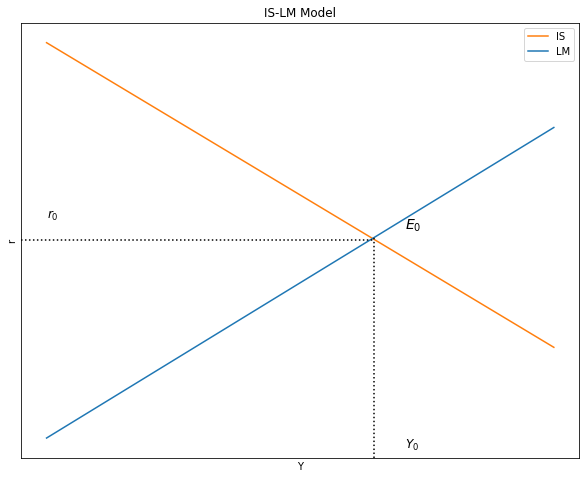

In [29]:
Y_size = 100 

Co = 36
Io = 39
Go = 51
Xo = 3
h = 0.7
b = 0.3
m = 0.4
t = 0.7

Y = np.arange(Y_size)

def r_IS(b, m, t, Co, Io, Go, Xo, h, Y):
    r_IS = (Co + Io + Go + Xo)/h - ( ( 1-(b-m)*(1-t) ) / h)*Y  
    return r_IS

r_is = r_IS(b, m, t, Co, Io, Go, Xo, h, Y)

Y_size = 100

k = 3
j = 2                
Ms = 200             
P  = 21              

Y = np.arange(Y_size)

# Ecuación

def r_LM(k, j, Ms, P, Y):
    r_LM = - (1/j)*(Ms/P) + (k/j)*Y
    return r_LM

r_lm = r_LM( k, j, Ms, P, Y)

y_max = np.max(r_lm)
fig, ax = plt.subplots(figsize=(10, 8))

# Curvas a graficar
# Curva IS
ax.plot(Y, r_is, label = "IS", color = "C1") #IS
# Curva LM
ax.plot(Y, r_lm, label="LM", color = "C0")  #LM

# Eliminar las cantidades de los ejes
ax.yaxis.set_major_locator(plt.NullLocator())   
ax.xaxis.set_major_locator(plt.NullLocator())

# Texto y figuras agregadas
# Graficar la linea horizontal - r
plt.axvline(x=64,  ymin= 0, ymax= 0.51, linestyle = ":", color = "black")
# Grafica la linea vertical - Y
plt.axhline(y=90, xmin= 0, xmax= 0.63, linestyle = ":", color = "black")

# Plotear los textos 
plt.text(70,95, '$E_0$', fontsize = 14, color = 'black')
plt.text(0,100, '$r_0$', fontsize = 12, color = 'black')
plt.text(70,-10, '$Y_0$', fontsize = 12, color = 'black')
ax.set(title="IS-LM Model", xlabel= r'Y', ylabel= r'r')
ax.legend()

plt.show()

Analice los efectos sobre las variables endógenas Y, r de una disminución del gasto fiscal. . El análisis debe ser intuitivo, matemático y gráfico.

- Mercado de Bienes
$$ Go⬇️ → DA⬇️ → DA<Y → Y⬇️ $$ 
- Mercado de dinero
$$ Y⬇️ → Md⬇️ → Md<Ms → r⬇️ $$ 

In [98]:
# nombrar variables como símbolos
Co, Io, Go, Xo, h, r, b, m, t, beta_0, beta_1  = symbols('Co Io Go Xo h r b m t beta_0, beta_1')

# nombrar variables como símbolos
k, j, Ms, P, Y = symbols('k j Ms P Y')

# Beta_0 y beta_1
beta_0 = (Co + Io + Go + Xo)
beta_1 = ( 1-(b-m)*(1-t) )

# Producto de equilibrio y la tasa de interes de equilibrio en el modelo IS-LM
Y_eq = (k*beta_0)/(k*h + j*beta_1) - ( beta_1 / (k*h + j*beta_1) )*(Ms/P)
r_eq = (j*beta_0)/(k*h + j*beta_1) + ( h / (k*h + j*beta_1) )*(Ms/P)

In [99]:
df_Y_eq_Go = diff(Y_eq, Go)
print("El Diferencial del Producto con respecto al diferencial del gasto autonomo = ", df_Y_eq_Go)

El Diferencial del Producto con respecto al diferencial del gasto autonomo =  k/(h*k + j*(-(1 - t)*(b - m) + 1))


In [100]:
df_r_eq_Go = diff(r_eq, Go)
print("El Diferencial de la tasa de interes con respecto al diferencial del gasto autonomo = ", df_r_eq_Go)

El Diferencial de la tasa de interes con respecto al diferencial del gasto autonomo =  j/(h*k + j*(-(1 - t)*(b - m) + 1))


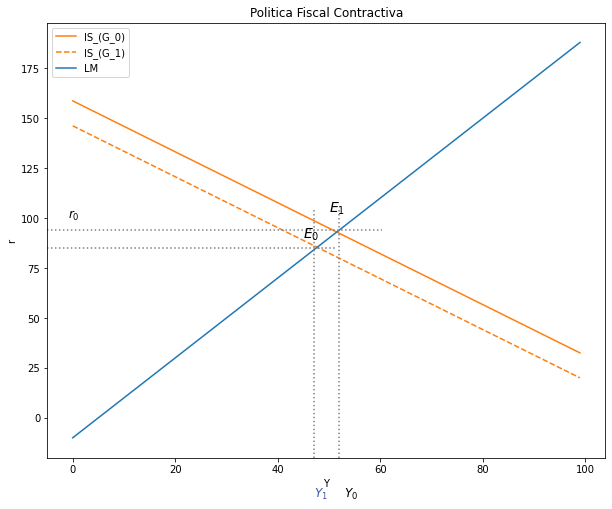

In [58]:
Y_size = 100 

Co = 35
Io = 40
Go = 50
Xo = 2
h = 0.8
b = 0.4
m = 0.5
t = 0.8

Y = np.arange(Y_size)


# Ecuación 
def r_IS(b, m, t, Co, Io, Go, Xo, h, Y):
    r_IS = (Co + Io + Go + Xo - Y * (1-(b-m)*(1-t)))/h
    return r_IS

r = r_IS(b, m, t, Co, Io, Go, Xo, h, Y)
 # Curva LM ORIGINAL

# Parámetros

Y_size = 100

k = 2
j = 1                
Ms = 200             
P  = 20               

Y = np.arange(Y_size)

# Ecuación

def i_LM( k, j, Ms, P, Y):
    i_LM = (-Ms/P)/j + k/j*Y
    return i_LM

i = i_LM( k, j, Ms, P, Y)

Go = 40

def r_IS(b, m, t, Co, Io, Go, Xo, h, Y):
    r_IS = (Co + Io + Go + Xo - Y * (1-(b-m)*(1-t)))/h
    return r_IS

r_G = r_IS(b, m, t, Co, Io, Go, Xo, h, Y)

# Dimensiones del gráfico
y_max = np.max(i)
fig, ax = plt.subplots(figsize=(10, 8))

# Curvas a graficar
ax.plot(Y, r, label = "IS_(G_0)", color = "C1") #IS_orginal
ax.plot(Y, r_G, label = "IS_(G_1)", color = "C1", linestyle = 'dashed') #IS_modificada

ax.plot(Y, i, label="LM", color = "C0")  #LM_original

# Texto y figuras agregadas
plt.axvline(x=47,  ymin= 0, ymax= 0.57, linestyle = ":", color = "grey")
plt.axhline(y=85, xmin= 0, xmax= 0.52, linestyle = ":", color = "grey")

plt.axvline(x=51.9,  ymin= 0, ymax= 0.57, linestyle = ":", color = "grey")
plt.axhline(y=94, xmin= 0, xmax= 0.6, linestyle = ":", color = "grey")
plt.text(50,103, '$E_1$', fontsize = 14, color = 'black')

plt.text(45,90, '$E_0$', fontsize = 14, color = 'black')
plt.text(-1,100, '$r_0$', fontsize = 12, color = 'black')
plt.text(53,-40, '$Y_0$', fontsize = 12, color = 'black')
#plt.text(47,52, '$E_1$', fontsize = 14, color = '#3D59AB')
#plt.text(-1,72, '$r_1$', fontsize = 12, color = '#3D59AB')
plt.text(47,-40, '$Y_1$', fontsize = 12, color = '#3D59AB')

#plt.text(69, 115, '→', fontsize=15, color='grey')
#plt.text(69, 52, '←', fontsize=15, color='grey')

# Título, ejes y leyenda
ax.set(title="Politica Fiscal Contractiva", xlabel= r'Y', ylabel= r'r')
ax.legend()

plt.show()

Analice los efectos sobre las variables endógenas Y, r de una disminución de la masa monetaria. . El análisis debe ser intuitivo, matemático y gráfico.

- Mercado de dinero
$$ Ms⬇️ → M^o⬇️ → M^o < M^d → r↑ $$

- Mercado de Bienes
$$ r↑ → I⬇️ → DA<Y → Y⬇️ $$ 

In [101]:
# nombrar variables como símbolos
Co, Io, Go, Xo, h, r, b, m, t, beta_0, beta_1  = symbols('Co Io Go Xo h r b m t beta_0, beta_1')

# nombrar variables como símbolos
k, j, Ms, P, Y = symbols('k j Ms P Y')

# Beta_0 y beta_1
beta_0 = (Co + Io + Go + Xo)
beta_1 = ( 1-(b-m)*(1-t) )

# Producto de equilibrio y la tasa de interes de equilibrio en el modelo IS-LM
Y_eq = (k*beta_0)/(k*h + j*beta_1) - ( beta_1 / (k*h + j*beta_1) )*(Ms/P)
r_eq = (j*beta_0)/(k*h + j*beta_1) + ( h / (k*h + j*beta_1) )*(Ms/P)

In [102]:
df_r_eq_Ms = diff(r_eq, Ms)
print("El Diferencial de la tasa de interes con respecto al diferencial de la masa monetaria = ", df_r_eq_Ms)

El Diferencial de la tasa de interes con respecto al diferencial de la masa monetaria =  h/(P*(h*k + j*(-(1 - t)*(b - m) + 1)))


In [103]:
df_Y_eq_Ms = diff(Y_eq, Ms)
print("El Diferencial del producto con respecto al diferencial de la masa monetaria = ", df_Y_eq_Ms)

El Diferencial del producto con respecto al diferencial de la masa monetaria =  -(-(1 - t)*(b - m) + 1)/(P*(h*k + j*(-(1 - t)*(b - m) + 1)))


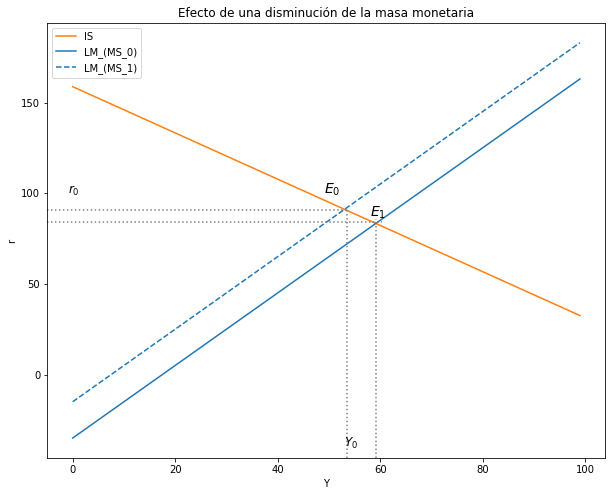

In [77]:
 # Curva IS ORIGINAL

# Parámetros

Y_size = 100 

Co = 35
Io = 40
Go = 50
Xo = 2
h = 0.8
b = 0.4
m = 0.5
t = 0.8

Y = np.arange(Y_size)


# Ecuación 
def r_IS(b, m, t, Co, Io, Go, Xo, h, Y):
    r_IS = (Co + Io + Go + Xo - Y * (1-(b-m)*(1-t)))/h
    return r_IS

r = r_IS(b, m, t, Co, Io, Go, Xo, h, Y)
# Curva LM ORIGINAL

# Parámetros

Y_size = 100

k = 2
j = 1                
Ms = 700            
P  = 20               

Y = np.arange(Y_size)

# Ecuación

def i_LM( k, j, Ms, P, Y):
    i_LM = (-Ms/P)/j + k/j*Y
    return i_LM

i = i_LM( k, j, Ms, P, Y)

# Definir SOLO el parámetro cambiado
Ms = 300

# Generar nueva curva LM con la variacion del Ms
def i_LM_Ms( k, j, Ms, P, Y):
    i_LM = (-Ms/P)/j + k/j*Y
    return i_LM

i_Ms = i_LM_Ms( k, j, Ms, P, Y)

# Gráfico

# Dimensiones del gráfico
y_max = np.max(i)
fig, ax = plt.subplots(figsize=(10, 8))

# Curvas a graficar
ax.plot(Y, r, label = "IS", color = "C1") #IS_orginal
ax.plot(Y, i, label="LM_(MS_0)", color = "C0")  #LM_original

ax.plot(Y, i_Ms, label="LM_(MS_1)", color = "C0", linestyle = 'dashed')  #LM_modificada

# Lineas de equilibrio_0 
plt.axvline(x=53.5,  ymin= 0, ymax= 0.57, linestyle = ":", color = "grey")
plt.axhline(y=91, xmin= 0, xmax= 0.54, linestyle = ":", color = "grey")

# Lineas de equilibrio_1 
plt.axvline(x=59.1,  ymin= 0, ymax= 0.55, linestyle = ":", color = "grey")
plt.axhline(y=84, xmin= 0, xmax= 0.6, linestyle = ":", color = "grey")
plt.text(58,87, '$E_1$', fontsize = 14, color = 'black')

#plt.axhline(y=68, xmin= 0, xmax= 0.52, linestyle = ":", color = "grey")

# Textos ploteados
plt.text(49,100, '$E_0$', fontsize = 14, color = 'black')
plt.text(-1,100, '$r_0$', fontsize = 12, color = 'black')
plt.text(53,-40, '$Y_0$', fontsize = 12, color = 'black')
#plt.text(50,52, '$E_1$', fontsize = 14, color = '#3D59AB')
#plt.text(-1,72, '$r_1$', fontsize = 12, color = '#3D59AB')
#plt.text(47,-40, '$Y_1$', fontsize = 12, color = '#3D59AB')

#plt.text(69, 115, '→', fontsize=15, color='grey')
#plt.text(69, 52, '←', fontsize=15, color='grey')

# Título, ejes y leyenda
ax.set(title="Efecto de una disminución de la masa monetaria", xlabel= r'Y', ylabel= r'r')
ax.legend()
plt.show()

Analice los efectos sobre las variables endógenas Y, r de un incremento de la tasa de impuestos. . El análisis debe ser intuitivo, matemático y gráfico.

- Mercado de dinero
$$ t↑→ Da⬇️ → Da <Y → Y⬇️ $$

- Mercado de Bienes
$$ Y⬇️ → Md⬇️ → Md<Ms → r⬇️ $$

In [104]:
# nombrar variables como símbolos
Co, Io, Go, Xo, h, r, b, m, t, beta_0, beta_1  = symbols('Co Io Go Xo h r b m t beta_0, beta_1')

# nombrar variables como símbolos
k, j, Ms, P, Y = symbols('k j Ms P Y')

# Beta_0 y beta_1
beta_0 = (Co + Io + Go + Xo)
beta_1 = ( 1-(b-m)*(1-t) )

# Producto de equilibrio y la tasa de interes de equilibrio en el modelo IS-LM
Y_eq = (k*beta_0)/(k*h + j*beta_1) - ( beta_1 / (k*h + j*beta_1) )*(Ms/P)
r_eq = (j*beta_0)/(k*h + j*beta_1) + ( h / (k*h + j*beta_1) )*(Ms/P)

In [105]:
df_r_eq_t = diff(r_eq, t)
print("El Diferencial de la tasa de interés con respecto al diferencial de la tasa impositiva = ", df_r_eq_t)

El Diferencial de la tasa de interés con respecto al diferencial de la tasa impositiva =  -Ms*h*j*(b - m)/(P*(h*k + j*(-(1 - t)*(b - m) + 1))**2) - j**2*(b - m)*(Co + Go + Io + Xo)/(h*k + j*(-(1 - t)*(b - m) + 1))**2


In [106]:
df_Y_eq_t = diff(Y_eq, t)
print("El Diferencial del producto con respecto al diferencial de la tasa impositiva = ", df_Y_eq_t)

El Diferencial del producto con respecto al diferencial de la tasa impositiva =  Ms*j*(b - m)*(-(1 - t)*(b - m) + 1)/(P*(h*k + j*(-(1 - t)*(b - m) + 1))**2) - Ms*(b - m)/(P*(h*k + j*(-(1 - t)*(b - m) + 1))) - j*k*(b - m)*(Co + Go + Io + Xo)/(h*k + j*(-(1 - t)*(b - m) + 1))**2


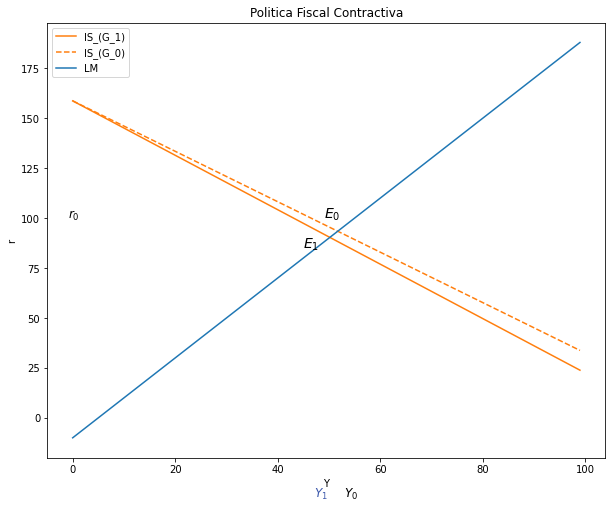

In [97]:
 # Curva IS ORIGINAL

# Parámetros

Y_size = 100 

Co = 35
Io = 40
Go = 50
Xo = 2
h = 0.8
b = 0.4
m = 0.5
t = 0.1

Y = np.arange(Y_size)


# Ecuación 
def r_IS(b, m, t, Co, Io, Go, Xo, h, Y):
    r_IS = (Co + Io + Go + Xo - Y * (1-(b-m)*(1-t)))/h
    return r_IS

r = r_IS(b, m, t, Co, Io, Go, Xo, h, Y)


#2--------------------------------------------------
    # Curva LM ORIGINAL

# Parámetros

Y_size = 100

k = 2
j = 1                
Ms = 200             
P  = 20               

Y = np.arange(Y_size)

# Ecuación

def i_LM( k, j, Ms, P, Y):
    i_LM = (-Ms/P)/j + k/j*Y
    return i_LM

i = i_LM( k, j, Ms, P, Y)
 # NUEVA curva IS: reducción Gasto de Gobienro (Go)
    
# Definir SOLO el parámetro cambiado
t= 0.9

# Generar la ecuación con el nuevo parámetro
def r_IS(b, m, t, Co, Io, Go, Xo, h, Y):
    r_IS = (Co + Io + Go + Xo - Y * (1-(b-m)*(1-t)))/h
    return r_IS

r_G = r_IS(b, m, t, Co, Io, Go, Xo, h, Y)
# Dimensiones del gráfico
y_max = np.max(i)
fig, ax = plt.subplots(figsize=(10, 8))

# Curvas a graficar
ax.plot(Y, r, label = "IS_(G_1)", color = "C1") #IS_orginal
ax.plot(Y, r_G, label = "IS_(G_0)", color = "C1", linestyle = 'dashed') #IS_modificada

ax.plot(Y, i, label="LM", color = "C0")  #LM_original

plt.text(45,85, '$E_1$', fontsize = 14, color = 'black')

plt.text(49,100, '$E_0$', fontsize = 14, color = 'black')
plt.text(-1,100, '$r_0$', fontsize = 12, color = 'black')
plt.text(53,-40, '$Y_0$', fontsize = 12, color = 'black')
#plt.text(50,52, '$E_1$', fontsize = 14, color = '#3D59AB')
#plt.text(-1,72, '$r_1$', fontsize = 12, color = '#3D59AB')
plt.text(47,-40, '$Y_1$', fontsize = 12, color = '#3D59AB')

#plt.text(69, 115, '→', fontsize=15, color='grey')
#plt.text(69, 52, '←', fontsize=15, color='grey')

# Título, ejes y leyenda
ax.set(title="Politica Fiscal Contractiva", xlabel= r'Y', ylabel= r'r')
ax.legend()

plt.show()


# Lectura


En su artículo, Waldo Mendoza, busca contestar  si extendiendo el modelo estándar de demanda y oferta agregada de una economía cerrada para incorporar las innovaciones de la política monetaria aplicadas con el objetivo de contrarrestar las secuelas de la crisis internacional de 2008-2009 ¿es posible modelar la política monetaria no convencional de la FED?. Es interesante como yo comentaba en mi issue pasado, semana 2, que me gusta cuando se usan los modelos tradicionales para intentar explicar situaciones en contextos más actuales y este paper también está siguiendo ese camino: muestra como los modelos y métodos  que se piensan viejos todavía sirven para analizar las crisis macroeconómicas contemporáneas.Sumado a eso, vemos como el autor separa los conceptos que usará por secciones y explica dentro de cada una los detalles como los componetes de sus formulas. Además, que todos son precisados de la forma en cómo los usará en este modelo: "El equilibrio estacionario, en el marco de este modelo, se define como una situación en
la que el nivel de precios efectivo no difiere del nivel de precios esperado...". Sin embargo, una clara debilidad del autor es que ha realizado un artículo de como casi 90 páginas, pero su conclusión ha sido bastante pobre: una página y media. En lo personal, esperaba una sintesis que me resumiera lo que vi en todo el artículo a modo de recopilación sobre lo más importante o me sintetizara argumentos que quizas quedaron poco claros, cosa que no se dio. Por otro lado,Waldo como yo , estamos de acuerdo en que el articulo contribuye al conocimiento sobre la pregunta en la medida que solo incluyendo un mercado de bonos a largo plazo al modelo IS-LM permite discutir las políticas monetaria no convencionales aplicadas por el FED en la crisis internacional de 2008-2009. Además, no solo se queda en estudiar las políticas no convencionales , sino que se descubre que agregando una ecuación de la oferta agregada, "se puede construir un modelo para estudiar los efectos de las
políticas macroeconómicas, convencionales y no convencionales, así como de los choques de oferta, sobre la producción, el nivel de precios, la tasa de interés de largo
plazo y la cantidad de dinero". Finalmente, un escrito que sería interesante leer, que no identifico en el análisis de Waldo, es el impacto sobre el tipo de cambio dólar estadounidense de las medidas de política monetaria no convencional llevadas a cabo por la Reserva Federal Estadounidense tras el agotamiento de los instrumentos de política monetaria tradicionales en un contexto de crisis financiera global, pues al final todos los países nos terminamos basando en el dolar. 

Analice los efectos sobre las variables endógenas Y, r de una disminución de los Precios. . El análisis debe ser intuitivo, matemático y gráfico.

- Mercado de BIENES
$$ P↓ → Da↑-Da> Y-> Y↑ $$

- Mercado de DINERO
$$ Y↑ →  Md↑ → Md>Ms → r↑ $$ 

In [110]:
Co, Io, Go, Xo, h, r, b, m, t, beta_0, beta_1  = symbols('Co Io Go Xo h r b m t beta_0, beta_1')
k, j, Ms, P, Y = symbols('k j Ms P Y')

beta_0 = (Co + Io + Go + Xo)
beta_1 = ( 1-(b-m)*(1-t) )

Y_eq = (k*beta_0)/(k*h + j*beta_1) - ( beta_1 / (k*h + j*beta_1) )*(Ms/P)
r_eq = (j*beta_0)/(k*h + j*beta_1) + ( h / (k*h + j*beta_1) )*(Ms/P)

In [111]:
df_Y_eq_P = diff(Y_eq, P)
print("El Diferencial del Producto con respecto al diferencial deL nivel de precios = ", df_Y_eq_P)

El Diferencial del Producto con respecto al diferencial deL nivel de precios =  Ms*(-(1 - t)*(b - m) + 1)/(P**2*(h*k + j*(-(1 - t)*(b - m) + 1)))


In [112]:
df_r_eq_P = diff(r_eq, P)
print("El Diferencial de la tasa de interes con respecto al diferencial del nivel de precios = ", df_r_eq_P)

El Diferencial de la tasa de interes con respecto al diferencial del nivel de precios =  -Ms*h/(P**2*(h*k + j*(-(1 - t)*(b - m) + 1)))


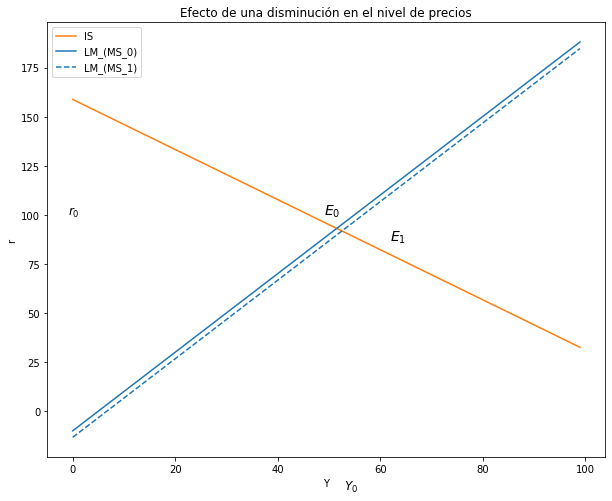

In [114]:
Y_size = 100 

Co = 35
Io = 40
Go = 50
Xo = 2
h = 0.8
b = 0.4
m = 0.5
t = 0.8

Y = np.arange(Y_size)


# Ecuación 
def r_IS(b, m, t, Co, Io, Go, Xo, h, Y):
    r_IS = (Co + Io + Go + Xo - Y * (1-(b-m)*(1-t)))/h
    return r_IS

r = r_IS(b, m, t, Co, Io, Go, Xo, h, Y)


#2--------------------------------------------------
    # Curva LM ORIGINAL

# Parámetros

Y_size = 100

k = 2
j = 1                
Ms = 200             
P  = 20               

Y = np.arange(Y_size)

# Ecuación

def i_LM( k, j, Ms, P, Y):
    i_LM = (-Ms/P)/j + k/j*Y
    return i_LM

i = i_LM( k, j, Ms, P, Y)

# Definir SOLO el parámetro cambiado
P = 15

# Generar nueva curva LM con la variacion del Ms
def i_LM_Ms( k, j, Ms, P, Y):
    i_LM = (-Ms/P)/j + k/j*Y
    return i_LM

i_Ms = i_LM_Ms( k, j, Ms, P, Y)
# Dimensiones del gráfico
y_max = np.max(i)
fig, ax = plt.subplots(figsize=(10, 8))

# Curvas a graficar
ax.plot(Y, r, label = "IS", color = "C1") #IS_orginal
ax.plot(Y, i, label="LM_(MS_0)", color = "C0")  #LM_original

ax.plot(Y, i_Ms, label="LM_(MS_1)", color = "C0", linestyle = 'dashed')  #LM_modificada

plt.text(62,87, '$E_1$', fontsize = 14, color = 'black')

#plt.axhline(y=68, xmin= 0, xmax= 0.52, linestyle = ":", color = "grey")

# Textos ploteados
plt.text(49,100, '$E_0$', fontsize = 14, color = 'black')
plt.text(-1,100, '$r_0$', fontsize = 12, color = 'black')
plt.text(53,-40, '$Y_0$', fontsize = 12, color = 'black')
#plt.text(50,52, '$E_1$', fontsize = 14, color = '#3D59AB')
#plt.text(-1,72, '$r_1$', fontsize = 12, color = '#3D59AB')
#plt.text(47,-40, '$Y_1$', fontsize = 12, color = '#3D59AB')

#plt.text(69, 115, '→', fontsize=15, color='grey')
#plt.text(69, 52, '←', fontsize=15, color='grey')

# Título, ejes y leyenda
ax.set(title="Efecto de una disminución en el nivel de precios", xlabel= r'Y', ylabel= r'r')
ax.legend()

plt.show()
